In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from matplotlib.colors import ListedColormap

In [15]:
data = pd.read_csv('drag_curves.csv')

data.fillna(0.0)

,v1,d1,v2,d2,v3,d3,v4,d4,v5,d5
0,4597.12589,52.48519,4282.55648,32.60970,4282.55648,33.53610,3201.22412,33.28345,3201.22412,22.16665
1,4597.12589,51.97988,4282.55648,33.03079,4282.55648,33.11501,3201.22412,32.86236,3207.77765,21.74556
2,4636.44706,51.64300,4282.55648,33.45188,4308.77059,32.94657,3220.88471,32.60970,3240.54530,21.82978
3,4675.76824,51.64300,4256.34236,32.94657,4341.53824,32.94657,3253.65236,32.86236,3273.31295,21.82978
4,4715.08942,51.64300,4223.57471,32.94657,4374.30589,32.94657,3286.42001,32.94657,3306.08059,21.91400
...,...,...,...,...,...,...,...,...,...,...
224,0.00000,0.00000,7474.12529,8.01800,0.00000,0.00000,0.00000,0.00000,5934.04588,10.37611
225,0.00000,0.00000,7506.89294,7.84957,0.00000,0.00000,0.00000,0.00000,6137.20530,8.94440
226,0.00000,0.00000,7513.44647,8.27066,0.00000,0.00000,0.00000,0.00000,6333.81118,7.42847
227,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6327.25765,7.00738


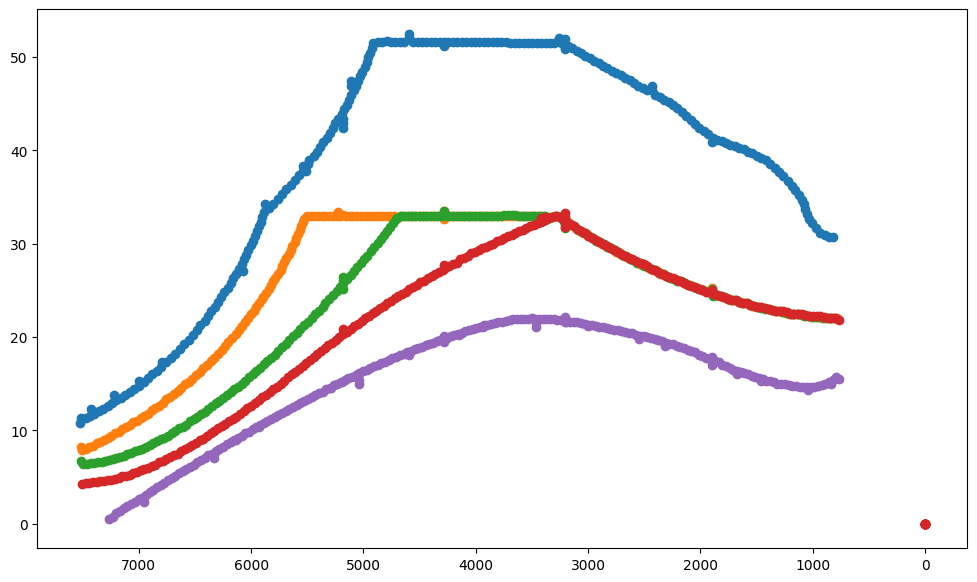

In [16]:
v_columns = [col for col in data.columns if col.startswith('v')]
d_columns = [col for col in data.columns if col.startswith('d')]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

plt_ = ax

plt_.invert_xaxis()

for v_col, d_col in zip(v_columns, d_columns):

    v_array = np.nan_to_num(data[v_col].to_numpy(), nan = 0)
    d_array = np.nan_to_num(data[d_col].to_numpy(), nan = 0)
    

    plt1 = plt_.scatter(v_array, d_array)
    
#img = plt.imread("drag.png")
#plt_.imshow(img, aspect='auto', extent=[7620, 0, 0, 60], alpha=1, cmap='Greys_r')

In [25]:
v_columns = [col for col in data.columns if col.startswith('v')]
d_columns = [col for col in data.columns if col.startswith('d')]

def traj_disp_new(n, data):
    if n==1:
        
        r_speed = (5181, 7925)
        drag_datums = [6, 8, 10, 15, 20, 25, 30]

    elif n==2:
        r_speed = (4267, 5181)
        drag_datums = [20, 25, 35, 45]

    elif n==3:
        r_speed = (3200, 4267)
        drag_datums = [25, 35, 45]

    elif n==4:
        r_speed = (1890, 3200)
        drag_datums = [20, 30, 40]

    elif n==5:
        r_speed = (760, 1890)
        drag_datums = [10, 20, 30, 40]
        

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax
    
    
    for v_col, d_col in zip(v_columns, d_columns):
        
        disp_data = data[(data[v_col].between(*r_speed))][[v_col, d_col]]
        
        v_array = disp_data[v_col].to_numpy()
        d_array = disp_data[d_col].to_numpy()

        traj_x = np.array([traj_x_convert_new(n, v, d) for v, d in zip(v_array, d_array)])
        traj_y = np.array([traj_y_convert_new(n, v) for v in v_array])
        
        plt1 = plt_.scatter(traj_x, traj_y, s=10)

    drag_v = np.linspace(r_speed[0], r_speed[1], 200)
    
    for dval in drag_datums:
        drag_l_x = np.array([traj_x_convert_new(n, drag_v, dval) for v, d in zip(v_array, d_array)])
        drag_l_y = np.array([traj_y_convert_new(n, drag_v) for v in v_array])
        plt1 = plt_.scatter(drag_l_x, drag_l_y, s=1, c='k')

    major_ticks = np.arange(0, 500, 25)
    
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    plt_.set_xlim([0, 500])
    plt_.set_ylim([50, 350])
    
    
        
def traj_x_convert_new(n, vel, drag):
    
    if n==1:
        return 1269.3735913802313 + -0.08206361592134565 * vel**1 * drag**0 + -153.9799520644858 * vel**0 * drag**1 + -3.1466697000533627e-06 * vel**2 * drag**0 + 0.01314221307938963 * vel**1 * drag**1 + 4.662789044310247 * vel**0 * drag**2 + 7.728348100366489e-10 * vel**3 * drag**0 + -4.161746084256363e-07 * vel**2 * drag**1 + -0.00015695195109508781 * vel**1 * drag**2 + -0.052420876333425334 * vel**0 * drag**3
    elif n==2:
        return -119.27311679936585 + 0.1310360825751968 * vel**1 * drag**0 + -14.509634466688668 * vel**0 * drag**1 + -4.508956766569039e-07 * vel**2 * drag**0 + 0.0014529141150055665 * vel**1 * drag**1 + -0.004804810480900542 * vel**0 * drag**2
    elif n==3:
        return-149.89669862960386 + 0.20623953463938421 * vel**1 * drag**0 + -14.736386540438081 * vel**0 * drag**1 + -4.726735117477343e-07 * vel**2 * drag**0 + 0.00040459906559150603 * vel**1 * drag**1 + 0.07268485357148893 * vel**0 * drag**2
    elif n==4:
        return -947.0277680149138 + 0.9326046841966658 * vel**1 * drag**0 + -15.119041886140064 * vel**0 * drag**1 + -0.00010680530051221382 * vel**2 * drag**0 + -0.0022032464462389545 * vel**1 * drag**1 + 0.21019379999928509 * vel**0 * drag**2
    elif n==5:
        return -454.1109719968744 + 0.920975633806626 * vel**1 * drag**0 + -3.5281349354281684 * vel**0 * drag**1 + -0.00019912799779653323 * vel**2 * drag**0 + -0.0007382687005499898 * vel**1 * drag**1 + -0.02196699999990539 * vel**0 * drag**2
        
            
def traj_y_convert_new(n, vel):

    if n==1:
        out = (0.00036443148 * vel - 1.88811953353)
    elif n==2:
        out = (0.0010940919 * vel - 4.66849015317)
    elif n==3:
        out = (0.00093720712 * vel - 2.99906279288)
    elif n==4:
        out = (0.00076335877 * vel - 1.4427480916)
    elif n==5:
        out = (0.00088495575 * vel - 0.67256637168)

    return  59.5 + 280.2 * out
    
#traj_bounds= [[0, 500], [50, 350]]

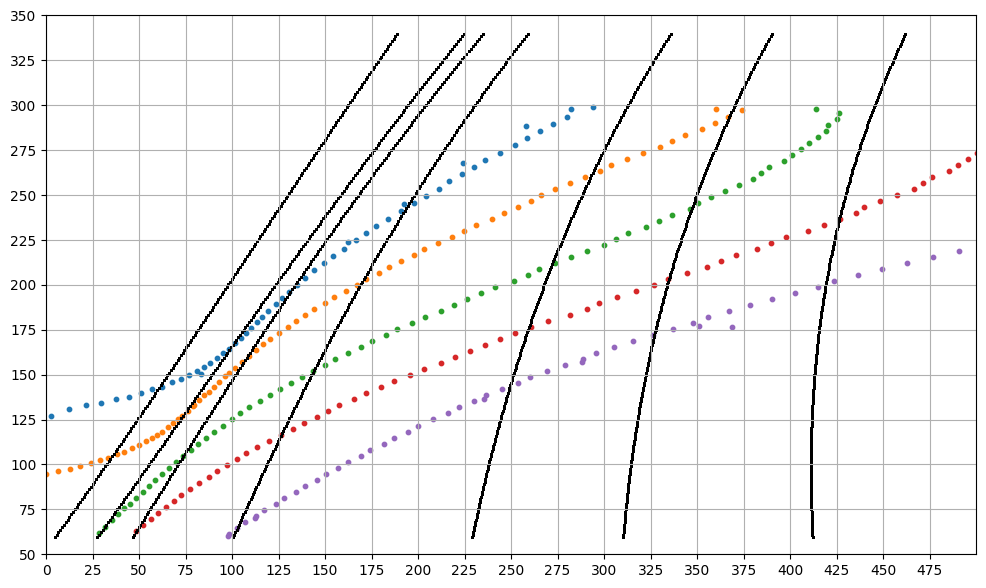

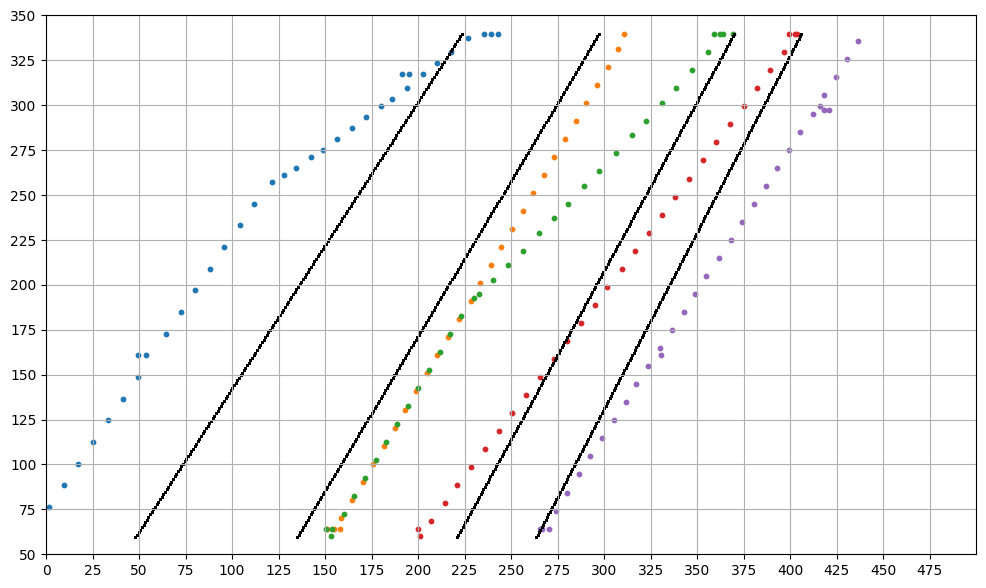

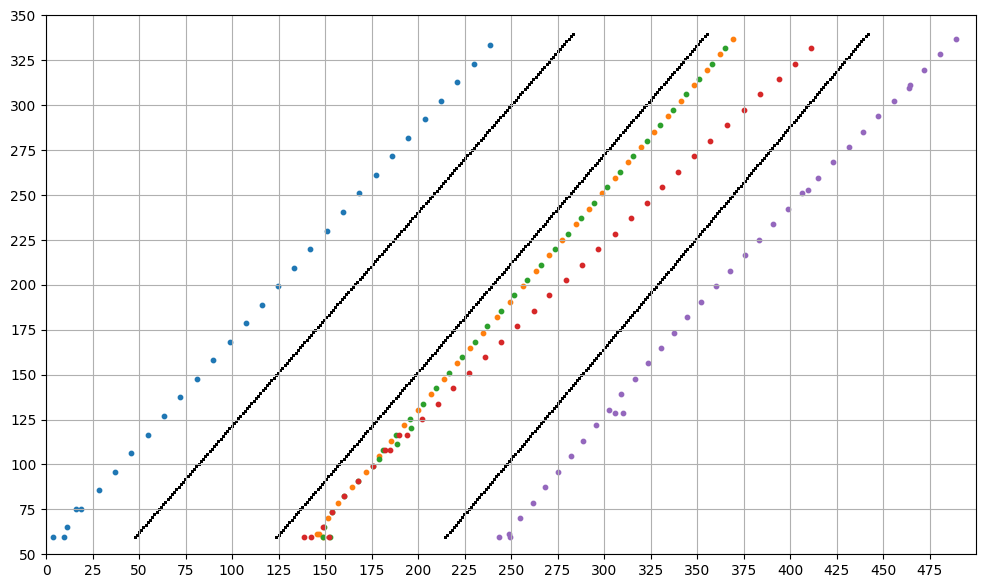

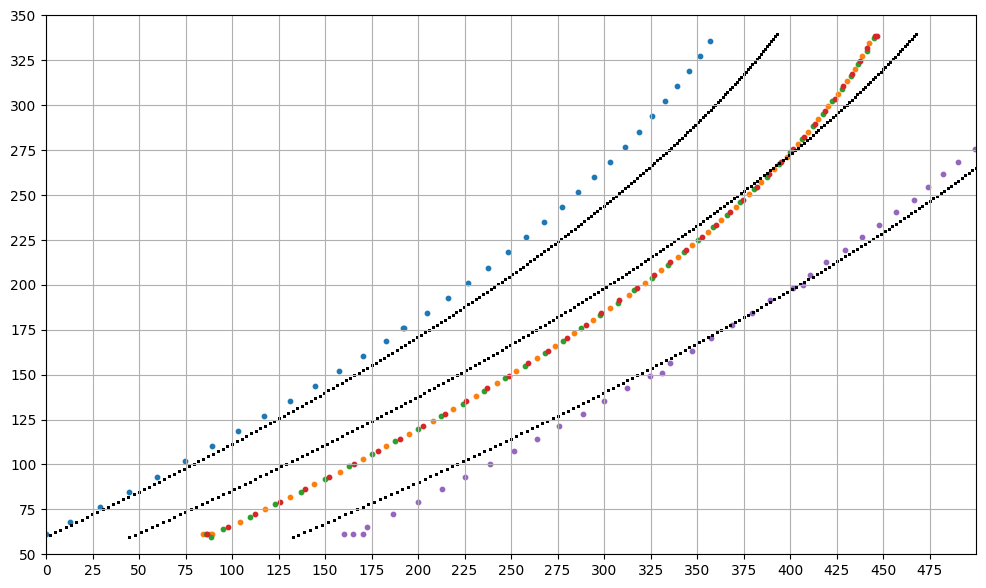

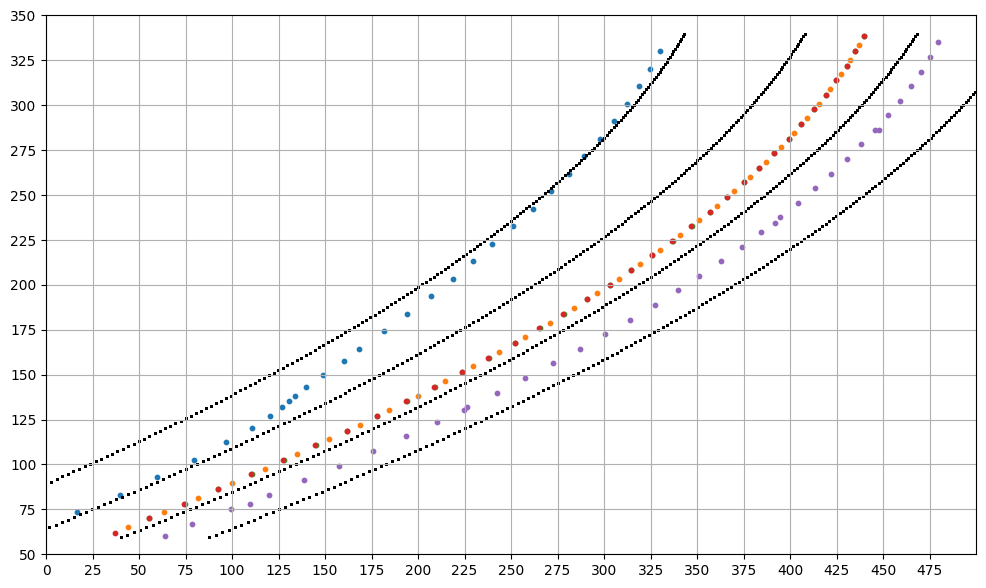

In [27]:
traj_disp_new(1, data)
traj_disp_new(2, data)
traj_disp_new(3, data)
traj_disp_new(4, data)
traj_disp_new(5, data)